# Image Detection Model using CNN

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.models import Sequential
import matplotlib.pyplot as plt

In [2]:
#Data 
train_path = "D:\\Tensorflow\\train"
test_path = "D:\\Tensorflow\\test"
validation_path = "D:\\Tensorflow\\validation"

In [3]:
#Define height and width for data
imgh = 180
imgw = 180

In [4]:
#Read the train data
data_train = tf.keras.utils.image_dataset_from_directory(
    train_path,
    shuffle = True,
    image_size = (imgw,imgh),
    batch_size = 32,
    validation_split = False
)

#Read the validation data
data_val = tf.keras.utils.image_dataset_from_directory(
    validation_path,
    image_size = (imgw, imgh),
    batch_size = 32,
    shuffle = False,
    validation_split = False
)

#Read the testing Data
data_val = tf.keras.utils.image_dataset_from_directory(
    test_path,
    image_size = (imgw, imgh),
    batch_size = 32,
    shuffle = False,
    validation_split = False
    
)

Found 3115 files belonging to 36 classes.


In [5]:
#Labels/class of images
category = data_train.class_names

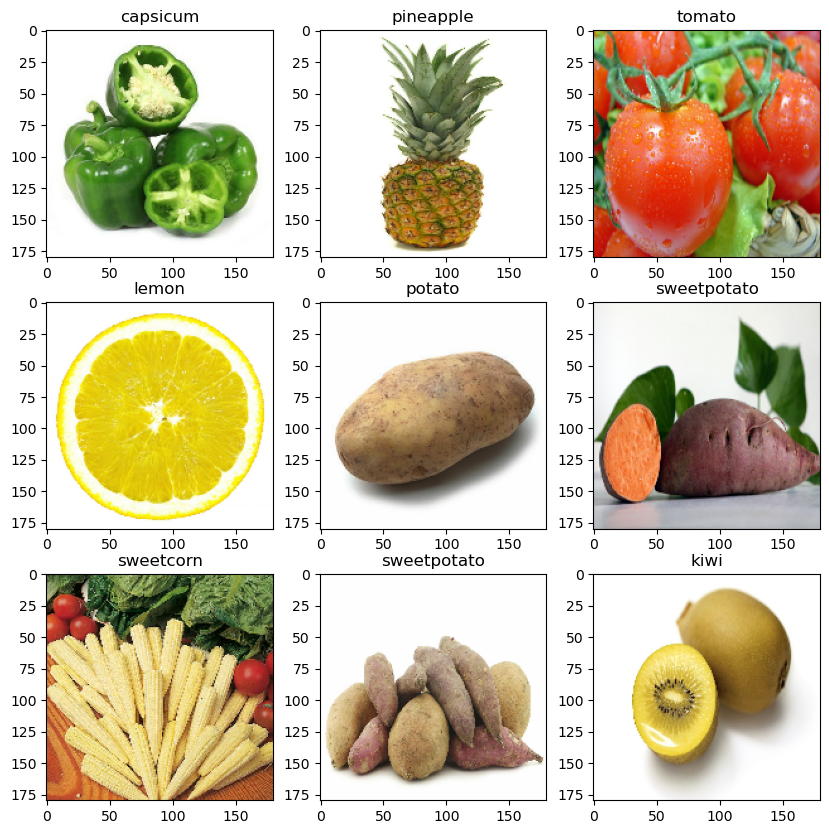

In [8]:
#Images and classes
plt.figure(figsize= (10,10))
for img, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(img[i].numpy().astype('uint8'))
        plt.title(category[labels[i]])

In [9]:
#Creating the Sequential Model
model = Sequential(
    [
        layers.Rescaling(1./255),
        layers.Conv2D(16,3, padding = 'same', activation = 'relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(32,3, padding='same', activation = 'relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(128),
        layers.Dense(len(category))
    ]
)

In [10]:
#model compilation
model.compile(optimizer= 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

In [11]:
#model summary beforehand
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
#Iterating through the entire dataset
itr = 25
history = model.fit(data_train, validation_data = data_val,epochs= itr, batch_size = 32, verbose =1)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 183ms/step - accuracy: 0.0905 - loss: 3.5121 - val_accuracy: 0.4680 - val_loss: 2.0807
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 19s 180ms/step - accuracy: 0.3622 - loss: 2.2710 - val_accuracy: 0.7131 - val_loss: 1.1463
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 19s 180ms/step - accuracy: 0.5637 - loss: 1.5250 - val_accuracy: 0.8552 - val_loss: 0.5621
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 19s 179ms/step - accuracy: 0.7663 - loss: 0.8237 - val_accuracy: 0.8858 - val_loss: 0.4882
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 19s 180ms/step - accuracy: 0.8825 - loss: 0.3916 - val_accuracy: 0.9248 - val_loss: 0.3998
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 191ms/step - accuracy: 0.9393 - loss: 0.2500 - val_accuracy: 0.9359 - val_loss: 0.3403
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 19s 183ms/step - accuracy: 0.9555 - loss: 0.1998 - val_accuracy: 0.9499 - val_loss: 0.3339
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 195ms/step - accuracy: 0.9804 - loss: 0.1409 - val_accu

In [ ]:
#After fitting summary of mmdoel
model.summary()

Text(0.5, 1.0, 'Accuracy')

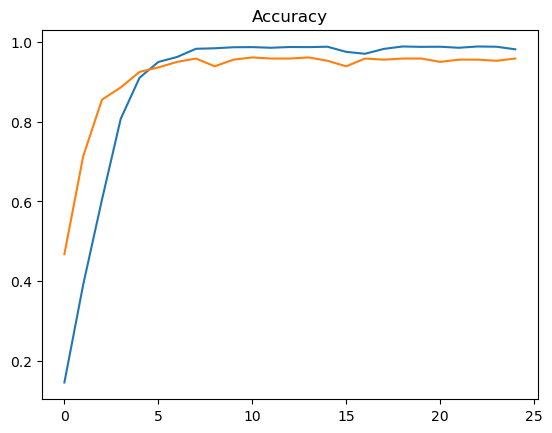

In [18]:
#Accuracy check with plot
itr_range = range(itr)
plt.plot(itr_range, history.history['accuracy'],label = 'Training accuracy')
plt.plot(itr_range, history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title("Accuracy")

Text(0.5, 1.0, 'Loss')

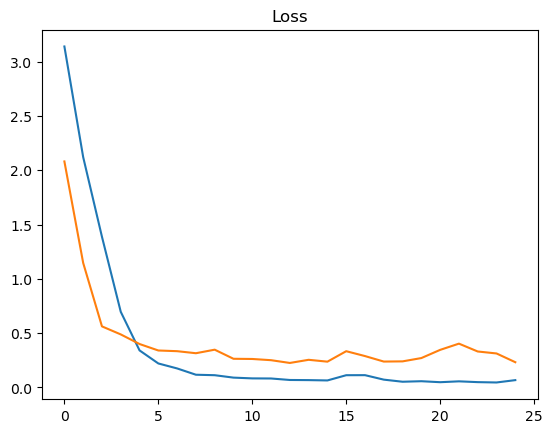

In [17]:
#Loss check with plot
plt.plot(itr_range, history.history['loss'],label = 'Training Loss')
plt.plot(itr_range, history.history['val_loss'], label = 'Validation Loss')
plt.title("Loss")

In [24]:
#Testing on unseen apple 
img1_path = 'Apple.jpg'
image = tf.keras.utils.load_img(img1_path, target_size = (imgh, imgw))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr, 0)
predict = model.predict(img_bat)
score = tf.nn.softmax(predict)
print('Image is of image {} with accuracy of {:.2f}%'.format(category[np.argmax(score)], np.max(score) * 100))

In [34]:
#Testing on unseen apple image similar to pomogranate
img1_path = 'Apple_test.jpg'

image = tf.keras.utils.load_img(img1_path, target_size = (imgh, imgw))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr, 0)

predict = model.predict(img_bat)
score = tf.nn.softmax(predict)
print('Image is of image {} with accuracy of {:.2f}%'.format(category[np.argmax(score)], np.max(score) * 100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Image is of image pomegranate with accuracy of 79.60%


In [36]:
#Testing on Orange image
img1_path = 'Orange.jpg'

image = tf.keras.utils.load_img(img1_path, target_size = (imgh, imgw))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr, 0)

predict = model.predict(img_bat)
score = tf.nn.softmax(predict)
print('Image is of image {} with accuracy of {:.2f}%'.format(category[np.argmax(score)], np.max(score) * 100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Image is of image orange with accuracy of 92.15%
